In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from calcul_structure import *

In [2]:
## Propriété materiaux [N, m]
E = 1
I = 1
A = 1

#Element 1
L=1

# Ligne Influence Moment flechissant en  E
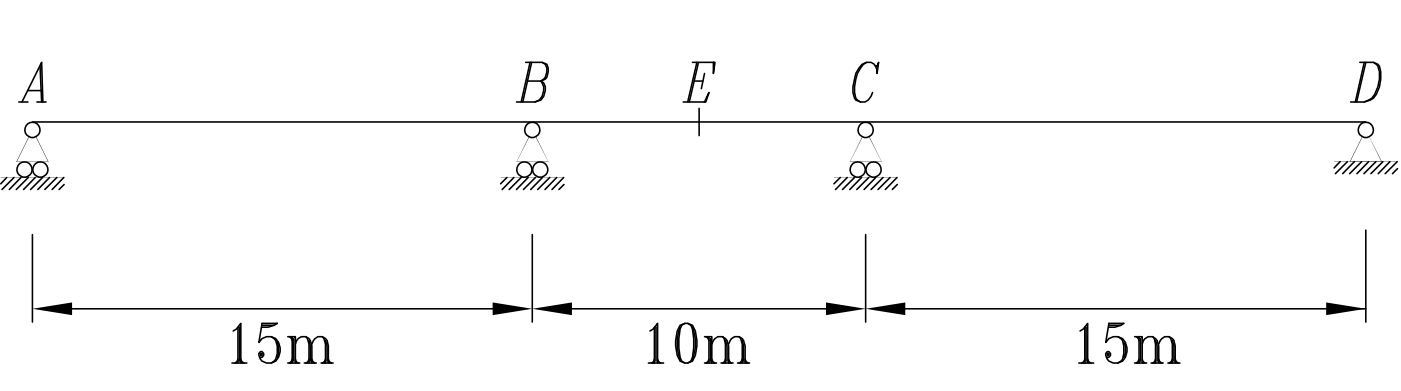

In [3]:
# Coordonnée éléments
XY = np.array([
     [0, 0], # Appui A
     [1, 0],
     [2, 0],
     [3, 0],
     [4, 0],
     [5, 0],
     [6, 0],
     [7, 0],
     [8, 0],
     [9, 0],
     [10,0],
     [11, 0],
     [12, 0],
     [13, 0],
     [14, 0],
     [15, 0], # Appui B
     [16, 0],
     [17, 0],
     [18, 0],
     [19, 0],
     [20,0], # Point E
     [20,0], # Point E (Dupliqué)
     [21,0],
     [22,0],
     [23,0],
     [24,0],
     [25,0], # Appui C
     [26,0],
     [27,0],
     [28,0],
     [29,0],
     [30,0],
     [31,0],
     [32,0],
     [33,0],
     [34,0],
     [35,0],
     [36,0],
     [37,0],
     [38,0],
     [39,0],
     [40,0], # Appui D
])

In [4]:
#Matrice de rigidité élémentaire en coordonnées locales
# Discretisation de la poutre en 8 element de longeur 5 m
mat_elem_local_1 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 1

print(mat_elem_local_1)

[[  1.   0.   0.  -1.   0.   0.]
 [  0.  12.   6.   0. -12.   6.]
 [  0.   6.   4.   0.  -6.   2.]
 [ -1.   0.   0.   1.   0.   0.]
 [  0. -12.  -6.   0.  12.  -6.]
 [  0.   6.   2.   0.  -6.   4.]]


In [5]:
#Matrice de rotatio
rot_elem_1 = rotation_matrice(0) # Rotation Element 1

In [6]:
#Matrice de rigidité élémentaire en coordonnées locales
mat_elem_global_1 = np.matmul(np.matmul(np.transpose(rot_elem_1),mat_elem_local_1), rot_elem_1) # Matrice de rigidité Element 1

In [7]:
# Connection entre élément
# Degré de liberte de chaque élément de la forme
# LM[:, i] = [Uxi, Uyi, Thetai, Uxj, Uyj, Thetaj]
# Travée 1
LM = np.zeros((6, 41), dtype=int)
LM[:,0] =  [0, 0,  38, 0, 1,  39]
LM[:,1] =  [0, 1,  39, 0, 2,  40]    
LM[:,2] =  [0, 2,  40, 0, 3,  41]   
LM[:,3] =  [0, 3,  41, 0, 4,  42]
LM[:,4] =  [0, 4,  42, 0, 5,  43]   
LM[:,5] =  [0, 5,  43, 0, 6,  44]
LM[:,6] =  [0, 6,  44, 0, 7,  45]
LM[:,7] =  [0, 7,  45, 0, 8,  46]
LM[:,8] =  [0, 8,  46, 0, 9,  47]
LM[:,9] =  [0, 9,  47, 0, 10, 48]
LM[:,10] = [0, 10, 48, 0, 11, 49]
LM[:,11] = [0, 11, 49, 0, 12, 50]
LM[:,12] = [0, 12, 50, 0, 13, 51]
LM[:,13] = [0, 13, 51, 0, 14, 52]
LM[:,14] = [0, 14, 52, 0, 0,  53]

#Travée 2
LM[:,15] = [0, 0, 53, 0, 15, 54]
LM[:,16] = [0, 15, 54, 0, 16, 55]
LM[:,17] = [0, 16, 55, 0, 17, 56]
LM[:,18] = [0, 17, 56, 0, 18, 57]
LM[:,19] = [0, 18, 57, 0, 19, 58]
#meme deplacement vertical, rotation differente
LM[:,20] = [0, 19, 59, 0, 20, 60]
LM[:,21] = [0, 20, 60, 0, 21, 61]
LM[:,22] = [0, 21, 61, 0, 22, 62]
LM[:,23] = [0, 22, 62, 0, 23, 63]
LM[:,24] = [0, 23, 63, 0, 0,  64]

#Travée 3
LM[:,25] = [0, 0,  64, 0, 24, 65]
LM[:,26] = [0, 24, 65, 0, 25, 66]
LM[:,27] = [0, 25, 66, 0, 26, 67]
LM[:,28] = [0, 26, 67, 0, 27, 68]
LM[:,29] = [0, 27, 68, 0, 28, 69]
LM[:,30] = [0, 28, 69, 0, 29, 70]
LM[:,31] = [0, 29, 70, 0, 30, 71]
LM[:,32] = [0, 30, 71, 0, 31, 72]
LM[:,33] = [0, 31, 72, 0, 32, 73]
LM[:,34] = [0, 32, 73, 0, 33, 74]
LM[:,35] = [0, 33, 74, 0, 34, 75]
LM[:,36] = [0, 34, 75, 0, 35, 76]
LM[:,37] = [0, 35, 76, 0, 36, 77]
LM[:,38] = [0, 36, 77, 0, 37, 78]
LM[:,39] = [0, 37, 78, 0, 0,  79]

print(LM)


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  0 15 16 17 18 19 20 21 22
  23  0 24 25 26 27 28 29 30 31 32 33 34 35 36 37  0]
 [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 59 60 61 62
  63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14  0 15 16 17 18 19 20 21 22 23
   0 24 25 26 27 28 29 30 31 32 33 34 35 36 37  0  0]
 [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63
  64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79  0]]


In [8]:
# Assemblage de la matrice de rigidité
# Assemblage de la matrice de rigidité
K_global_2 = np.zeros((79, 79), dtype=np.float32)

for i in range(40):
    K_global_2 = assemblage_matrice_rigidite(LM, i, K_global_2, mat_elem_global_1)

print(K_global_2.shape)
np.linalg.inv(K_global_2)

(79, 79)


array([[ 3.890963  ,  7.027704  ,  9.322667  , ..., -0.44177777,
        -0.46044445, -0.46666667],
       [ 7.027704  , 13.213296  , 17.881332  , ..., -0.8717222 ,
        -0.90855557, -0.92083335],
       [ 9.322667  , 17.881332  , 24.912     , ..., -1.278     ,
        -1.332     , -1.35      ],
       ...,
       [-0.44177777, -0.8717222 , -1.278     , ...,  2.8465834 ,
         2.7288334 ,  2.6895833 ],
       [-0.46044445, -0.90855557, -1.332     , ...,  2.7288334 ,
         3.6103334 ,  3.5708334 ],
       [-0.46666667, -0.92083335, -1.35      , ...,  2.6895833 ,
         3.5708334 ,  4.53125   ]], dtype=float32)

In [9]:
#Vecteur de Force Nodale
P_global    = np.zeros(79)
P_global[57] = 1
P_global[58] = -1
print(P_global)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [10]:
#Solution 
U = np.linalg.solve(K_global_2, P_global)
print(U[0:38])

[ -2.48888889  -4.91111111  -7.2         -9.28888889 -11.11111111
 -12.6        -13.68888889 -14.31111111 -14.4        -13.88888889
 -12.71111111 -10.8         -8.08888889  -4.51111111   5.5
  12.          19.5         28.          37.5         28.
  19.5         12.           5.5         -4.51111111  -8.08888889
 -10.8        -12.71111111 -13.88888889 -14.4        -14.31111111
 -13.68888889 -12.6        -11.11111111  -9.28888889  -7.2
  -4.91111111  -2.48888889  -2.5       ]


In [11]:
# Line d'Influence Muller-Breslaut
M1 = U[57]
M2 = U[58]


LI  = U/(abs(M1) + abs(M2)) #changer le signe de M2 et M2 pour une somme en valeur absolue
print(LI)


[-0.12444444 -0.24555556 -0.36       -0.46444444 -0.55555556 -0.63
 -0.68444444 -0.71555556 -0.72       -0.69444444 -0.63555556 -0.54
 -0.40444444 -0.22555556  0.275       0.6         0.975       1.4
  1.875       1.4         0.975       0.6         0.275      -0.22555556
 -0.40444444 -0.54       -0.63555556 -0.69444444 -0.72       -0.71555556
 -0.68444444 -0.63       -0.55555556 -0.46444444 -0.36       -0.24555556
 -0.12444444 -0.125      -0.12333333 -0.11833333 -0.11       -0.09833333
 -0.08333333 -0.065      -0.04333333 -0.01833333  0.01        0.04166667
  0.07666667  0.115       0.15666667  0.20166667  0.25        0.3
  0.35        0.4         0.45        0.5        -0.5        -0.45
 -0.4        -0.35       -0.3        -0.25       -0.20166667 -0.15666667
 -0.115      -0.07666667 -0.04166667 -0.01        0.01833333  0.04333333
  0.065       0.08333333  0.09833333  0.11        0.11833333  0.12333333
  0.125     ]


[ 0.         -0.12444444 -0.24555556 -0.36       -0.46444444 -0.55555556
 -0.63       -0.68444444 -0.71555556 -0.72       -0.69444444 -0.63555556
 -0.54       -0.40444444 -0.22555556  0.          0.275       0.6
  0.975       1.4         1.875       1.875       1.4         0.975
  0.6         0.275       0.         -0.22555556 -0.40444444 -0.54
 -0.63555556 -0.69444444 -0.72       -0.71555556 -0.68444444 -0.63
 -0.55555556 -0.46444444 -0.36       -0.24555556 -0.12444444  0.        ]
25


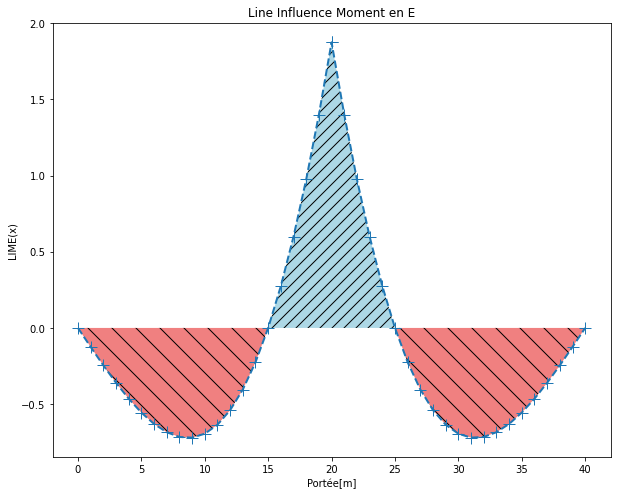

In [45]:
# Tracée ligne Influence
# Create the scatter plot
scale_factor = 1
x = scale_factor*XY[:, 0]
y = np.zeros((42,))
# Noeud 0, 1, 2
y[0]    = 0
y[1:15] = LI[0:14]
# Noeud 3 : Reaction appui, valeur deplacement vertical 0 
y[15] = 0
# # Noeud 4 : Point E
y[16:21] = LI[14:19]
y[21]  = LI[18]
# # # # Noeud 5, 6
y[22:26] = LI[19:23]
y[26] = 0
y[27:42] = LI[23:38]
# # # Noeud 7 reaction appui 0
y[41] = 0
print(y)
print(x[26])

plt.figure(figsize=(10,8))
plt.plot(x, y, '+--', linewidth=2, markersize=12)
# Fill the area above the line with a hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y >= 0), facecolor='lightblue', hatch='//')

# Fill the area below the line with a different hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y <= 0),  facecolor='lightcoral', hatch='\\')

# Add labels and title
plt.xlabel("Portée[m]")
plt.ylabel("LIME(x)")
plt.title("Line Influence Moment en E")

# Show the plot
plt.show()